In [1]:
import pandas as pd

In [14]:
df = pd.read_csv('./data/vehicle_prod.csv')
df

,Unnamed: 0,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


In [21]:
df = df.rename(columns={df.columns[0]:'Country'})

In [23]:
df.set_index('Country',inplace=True)

In [60]:
df = pd.read_csv('./data/vehicle_prod.csv', index_col= 0)
df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [28]:
df[['2007']]

,2007
China,7.71
EU,19.02
US,10.47
Japan,10.87
Korea,4.04
Mexico,2.01


In [36]:
df.columns.tolist()

['2007', '2008', '2009', '2010', '2011']

In [35]:
df['2007'].tolist()

[7.71, 19.02, 10.47, 10.87, 4.04, 2.01]

In [37]:
df.describe()

,2007,2008,2009,2010,2011
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,9.020000,8.461667,7.506667,9.280000,9.541667
std,6.019661,5.557519,5.142621,5.935921,6.105887
min,2.010000,2.050000,1.500000,2.250000,2.540000
25%,4.957500,4.822500,3.982500,5.050000,5.435000
50%,9.090000,8.200000,6.565000,8.345000,8.140000
75%,10.770000,10.235000,10.857500,14.152500,14.347500
max,19.020000,17.710000,15.000000,16.700000,17.480000


# 상관분석

## 상관관계

변수들간의 값의 변화의 유사도
- 음의상관 : 서로 반대 방향으로 변화, 증가>감소, 감소>증가
- 양의상관 : 서로 같은 방향으로 변화, 증가>증가, 감소>감소

In [38]:
df.corr()

,2007,2008,2009,2010,2011
2007,1.000000,0.991073,0.831447,0.769040,0.758271
2008,0.991073,1.000000,0.872296,0.810529,0.789512
2009,0.831447,0.872296,1.000000,0.988513,0.980025
2010,0.769040,0.810529,0.988513,1.000000,0.992667
2011,0.758271,0.789512,0.980025,0.992667,1.000000


In [62]:
#2007년~2011년 까지의 생산량을 합한 total_production 컬럼을 생성해보자
if 'total_production' not in df.columns:
    df['total_production'] = [df.loc[x].sum() for x in df.index]
df

,2007,2008,2009,2010,2011,total_production
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35


In [ ]:
#total 행 추가
if 'total' not in df.index:
    df.loc['total'] = df.sum(numeric_only=True)
df

,2007,2008,2009,2010,2011,total_production
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35
total,54.12,50.77,45.04,55.68,57.25,262.86


In [73]:
month_se = pd.Series(['1월', '2월', '3월', '4월'])
income_se = pd.Series([9500, 6200, 6050, 7000])
expenses_se = pd.Series([5040, 2350, 2300, 4800])

#데이터프레임 생성
store_df = pd.DataFrame({
    '월': month_se,
    '수입': income_se,
    '지출': expenses_se
})

#순수입 컬럼 추가하기

In [79]:
store_df['순수입'] = store_df['수입'] - store_df['지출']
store_df

,월,수입,지출,순수입
0,1월,9500,5040,4460
1,2월,6200,2350,3850
2,3월,6050,2300,3750
3,4월,7000,4800,2200


# 시각화

In [84]:
df = pd.read_csv('./data/vehicle_prod.csv', index_col= 0)

<Axes: >

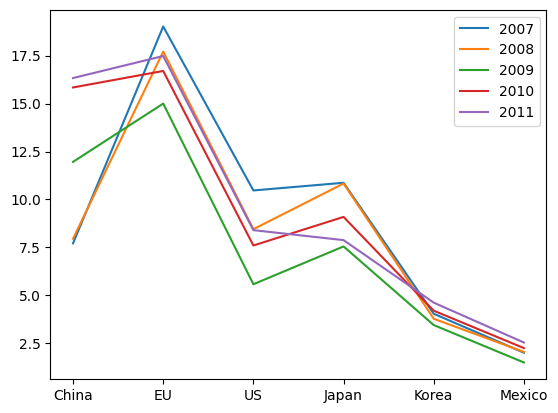

In [88]:
df.plot.line()

Text(0, 0.5, 'Production')

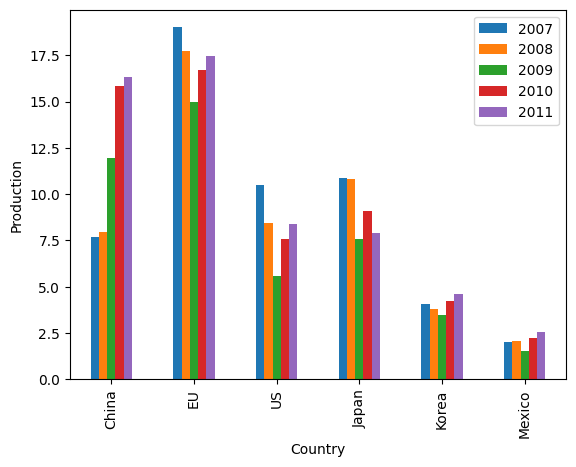

In [91]:
ax = df.plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Production')

<Axes: >

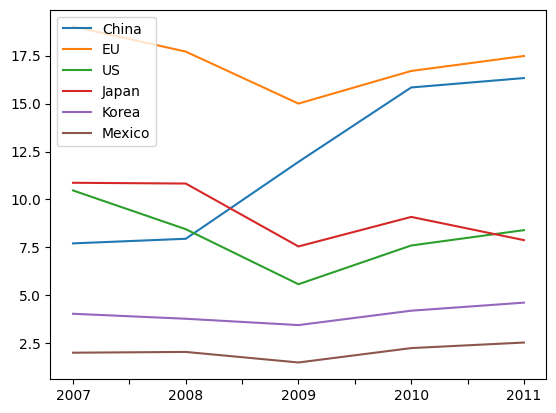

In [94]:
df_year = df.transpose()
df_year.plot.line()

# 결측치 np.nan, pd.NA

In [97]:
import numpy as np
np.nan != 0

True

In [98]:
x = [1,2,np.nan,4]
x

[1, 2, nan, 4]

In [100]:
pd.NA #NaN
pd.isna(x)

array([False, False,  True, False])

In [101]:
pd.NA == np.nan

<NA>

In [102]:
pd.isnull(np.nan)

True

In [103]:
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, np.nan, 30, 22, np.nan],
    'score': [90, 85, np.nan, 88, 95],
    'city': ['Seoul', 'Busan', np.nan, 'Incheon', 'Seoul']
}

df = pd.DataFrame(data)

In [ ]:
df

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [109]:
df.isnull().sum()

name     0
age      2
score    1
city     1
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5 non-null      object 
 1   age     3 non-null      float64
 2   score   4 non-null      float64
 3   city    4 non-null      object 
dtypes: float64(2), object(2)
memory usage: 292.0+ bytes


In [113]:
# 결측치 제거
df.dropna() #행전체 제거

,name,age,score,city
0,Alice,25.0,90.0,Seoul
3,David,22.0,88.0,Incheon


In [ ]:
df.dropna(axis=1) #열전체 제거

,name
0,Alice
1,Bob
2,Charlie
3,David
4,Eva


In [ ]:
df.dropna(subset=['score']) #해당컬럼에 na가 있는 행을 삭제

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [118]:
df.dropna(subset=['age'])

,name,age,score,city
0,Alice,25.0,90.0,Seoul
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon


# 채우기

In [120]:
df[['age']].fillna(0)

,age
0,25.0
1,0.0
2,30.0
3,22.0
4,0.0


## 수치형 변수의 경우는 대표값 : 평균, 중앙값, 최빈값

In [126]:
df['age'].mean()

np.float64(25.666666666666668)

In [121]:
df['age'].fillna(df['age'].mean())

0    25.000000
1    25.666667
2    30.000000
3    22.000000
4    25.666667
Name: age, dtype: float64

In [ ]:
df['age'].fillna(df['age'].median())

0    25.0
1    25.0
2    30.0
3    22.0
4    25.0
Name: age, dtype: float64

In [132]:
df['age'].mode()

0    22.0
1    25.0
2    30.0
Name: age, dtype: float64

In [131]:
df['age'].fillna(df['age'].mode().iloc[0])

0    25.0
1    22.0
2    30.0
3    22.0
4    22.0
Name: age, dtype: float64

In [ ]:
# 직전값ffill, 직후값bfill

In [ ]:
df['score'].ffill() # 직전값으로 채우기

0    90.0
1    85.0
2    85.0
3    88.0
4    95.0
Name: score, dtype: float64

In [ ]:
df['score'].bfill() # 직후값으로 채우기

0    90.0
1    85.0
2    88.0
3    88.0
4    95.0
Name: score, dtype: float64

In [ ]:
df['age'].mask(df['age'] < 30, 30) #컬럼의 값에 조건을 주어, 대체할 때 사용

0    30.0
1     NaN
2    30.0
3    30.0
4     NaN
Name: age, dtype: float64

In [143]:
titanic_df = pd.read_csv('data/titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [151]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [155]:
titanic_df['Age'].mean()

np.float64(29.69911764705882)

In [154]:
titanic_df['Age'].median()

np.float64(28.0)

In [157]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_12908\2607116919.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [159]:
# 대체 후 값 검증
titanic_df['Age'].mean()

np.float64(29.36158249158249)

<Axes: ylabel='Frequency'>

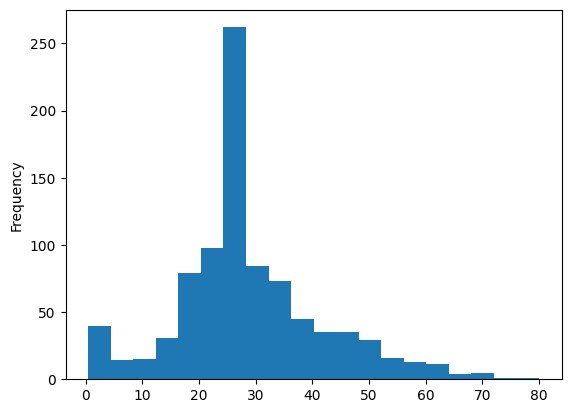

In [166]:
titanic_df['Age'].plot(kind='hist', bins=20)

In [169]:
titanic_df['Cabin'].fillna('unknown',inplace=True)

In [170]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [172]:
titanic_df['Cabin'].value_counts().head()

Cabin
unknown        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
Name: count, dtype: int64

In [179]:
#Embarked 최빈값으로 채우기
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0],inplace=True)
titanic_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [180]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 전처리 연습

In [270]:
df = pd.read_csv('data/CARD_SUBWAY_MONTH_202102.csv',index_col= False)

In [188]:
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210201,중앙선,용문,1282,1259,20210204
1,20210201,중앙선,지평,48,43,20210204
2,20210201,중앙선,아신,415,413,20210204
3,20210201,중앙선,양수,1463,1466,20210204
4,20210201,중앙선,운길산,495,463,20210204
...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,20210303
16747,20210228,중앙선,양평,3299,3187,20210303
16748,20210228,중앙선,원덕,322,304,20210303
16749,20210228,중앙선,용문,1899,1716,20210303


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    16751 non-null  int64 
 1   노선명     16751 non-null  object
 2   역명      16751 non-null  object
 3   승차총승객수  16751 non-null  int64 
 4   하차총승객수  16751 non-null  int64 
 5   등록일자    16751 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 785.3+ KB


In [190]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210201,중앙선,용문,1282,1259,20210204
1,20210201,중앙선,지평,48,43,20210204
2,20210201,중앙선,아신,415,413,20210204
3,20210201,중앙선,양수,1463,1466,20210204
4,20210201,중앙선,운길산,495,463,20210204


In [191]:
df.tail()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
16746,20210228,중앙선,오빈,216,236,20210303
16747,20210228,중앙선,양평,3299,3187,20210303
16748,20210228,중앙선,원덕,322,304,20210303
16749,20210228,중앙선,용문,1899,1716,20210303
16750,20210228,중앙선,지평,30,31,20210303


In [208]:
#총몇건인지 코드로 확인
df.index

RangeIndex(start=0, stop=16751, step=1)

In [207]:
#평균, 표준편차, 사분위수 등 주요 통계 지표를 확인하세요
df.describe()[['승차총승객수','하차총승객수']]

,승차총승객수,하차총승객수
count,16751.000000,16751.000000
mean,8567.344696,8536.474419
std,9006.651687,9064.054078
min,1.000000,0.000000
25%,2652.500000,2594.500000
50%,5857.000000,5733.000000
75%,11257.000000,11117.000000
max,88904.000000,87891.000000


In [192]:
#몇 개의 컬럼이 있는지, 각 컬럼에 포함된 데이터들의 타입은 무엇인지 확인해보세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    16751 non-null  int64 
 1   노선명     16751 non-null  object
 2   역명      16751 non-null  object
 3   승차총승객수  16751 non-null  int64 
 4   하차총승객수  16751 non-null  int64 
 5   등록일자    16751 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 785.3+ KB


In [196]:
#‘노선명’ 컬럼이 가지고 있는 데이터의 종류를 확인하세요
df['노선명'].value_counts()

노선명
5호선         1484
7호선         1428
2호선         1400
경부선         1092
6호선         1051
분당선          967
3호선          937
경원선          821
경의선          737
4호선          728
9호선          700
중앙선          588
경인선          560
경춘선          532
수인선          504
8호선          476
공항철도 1호선     392
안산선          364
9호선2~3단계     364
우이신설선        364
경강선          308
일산선          282
1호선          280
과천선          224
장항선          168
Name: count, dtype: int64

In [271]:
#‘승차총승객수’ 컬럼을 기준으로 데이터를 정렬하세요
# .sort_values()
df = df.sort_values('승차총승객수')
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
4678,20210208,분당선,복정,1,0,20210211
4367,20210208,6호선,연신내,1,0,20210211
13857,20210224,분당선,복정,1,0,20210227
10025,20210217,경의선,김포공항,1,0,20210220
11481,20210220,분당선,복정,1,0,20210223
...,...,...,...,...,...,...
14384,20210225,2호선,강남,84374,82960,20210228
14314,20210224,2호선,강남,84628,82667,20210227
13705,20210223,2호선,강남,84922,83364,20210226
10857,20210219,2호선,강남,86800,80948,20210222


In [211]:
#‘2호선’만 선택하세요.
df[df['노선명'] == '2호선']

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
532,20210201,2호선,용두(동대문구청),2365,2430,20210204
533,20210201,2호선,신정네거리,9269,9599,20210204
534,20210201,2호선,양천구청,6318,6738,20210204
535,20210201,2호선,도림천,1434,1469,20210204
536,20210201,2호선,신설동,3046,3110,20210204
...,...,...,...,...,...,...
16207,20210228,2호선,신설동,2806,2830,20210303
16208,20210228,2호선,도림천,480,477,20210303
16209,20210228,2호선,양천구청,3234,3281,20210303
16210,20210228,2호선,신정네거리,4814,4805,20210303


In [214]:
# ‘승차총승객수가’이 50000명 이상인 로우의 ‘역명’을 확인하세요
df[df['승차총승객수']>=50000]['역명']

550       구로디지털단지
552            신림
560            강남
562            선릉
566      잠실(송파구청)
           ...   
14994     구로디지털단지
15001        홍대입구
15579    잠실(송파구청)
15585          강남
15602        홍대입구
Name: 역명, Length: 109, dtype: object

In [272]:
# ‘등록일자’ 컬럼을 삭제하세요
df.drop('등록일자',axis=1,inplace=True)
df

,사용일자,노선명,역명,승차총승객수,하차총승객수
4678,20210208,분당선,복정,1,0
4367,20210208,6호선,연신내,1,0
13857,20210224,분당선,복정,1,0
10025,20210217,경의선,김포공항,1,0
11481,20210220,분당선,복정,1,0
...,...,...,...,...,...
14384,20210225,2호선,강남,84374,82960
14314,20210224,2호선,강남,84628,82667
13705,20210223,2호선,강남,84922,83364
10857,20210219,2호선,강남,86800,80948


In [273]:
#'승차총승객수’와 ‘하차총승객수’ 컬럼의 차이를 계산한 ‘승하차총승객수차이’ 컬럼을 생성하세요.
df['승하차총승객수차이'] = df['승차총승객수'] - df['하차총승객수']
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이
4678,20210208,분당선,복정,1,0,1
4367,20210208,6호선,연신내,1,0,1
13857,20210224,분당선,복정,1,0,1
10025,20210217,경의선,김포공항,1,0,1
11481,20210220,분당선,복정,1,0,1
...,...,...,...,...,...,...
14384,20210225,2호선,강남,84374,82960,1414
14314,20210224,2호선,강남,84628,82667,1961
13705,20210223,2호선,강남,84922,83364,1558
10857,20210219,2호선,강남,86800,80948,5852


In [232]:
#‘승하차총승객수차이’의 평균값을 계산하세요
df['승하차총승객수차이'].mean()

np.float64(30.870276401408873)

In [248]:
# 전체 중 10개의 아이템을 샘플링해서 데이터프레임을 생성하세요.
#.sample()
sample_df=df.sample(n = 10)
sample_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이
1147,20210202,2호선,아현,9229,9170,59
8746,20210215,경인선,백운,6314,6189,125
14972,20210226,2호선,뚝섬,22223,23720,-1497
8076,20210214,7호선,대림(구로구청),4957,4719,238
11241,20210219,7호선,장암,2260,877,1383
9502,20210216,6호선,광흥창(서강),8299,8157,142
3599,20210207,장항선,신창(순천향대),625,640,-15
9950,20210217,경부선,화서,6464,6260,204
14421,20210225,3호선,경복궁(정부서울청사),17763,17564,199
3308,20210206,경강선,곤지암,1414,1278,136


In [250]:
#sample_df의 ‘노선명’ 컬럼의 값이 1호선, 2호선, 3호선 4호선을 영어(line1, line2, line3, line4)로 변경하세요
sample_df['노선명'].replace({'1호선' : 'line1', '2호선' : 'line2', '3호선' : 'line3', '4호선' : 'line4'})

1147     line2
8746       경인선
14972    line2
8076       7호선
11241      7호선
9502       6호선
3599       장항선
9950       경부선
14421    line3
3308       경강선
Name: 노선명, dtype: object

In [274]:
# 인덱스를 '사용일자'로 바구어 설정
df2 = df.set_index('사용일자')
df2

,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이
사용일자,,,,,
20210208,분당선,복정,1,0,1
20210208,6호선,연신내,1,0,1
20210224,분당선,복정,1,0,1
20210217,경의선,김포공항,1,0,1
20210220,분당선,복정,1,0,1
...,...,...,...,...,...
20210225,2호선,강남,84374,82960,1414
20210224,2호선,강남,84628,82667,1961
20210223,2호선,강남,84922,83364,1558


In [275]:
def getDate(data):
    dt = str(data)
    yy = dt[0:4]
    mm = dt[4:6]
    dd = dt[6:8]
    return yy + '-' + mm + '-' + dd

# df['사용일자'].apply(getDate)
df2.index = [getDate(x) for x in df2.index]

In [276]:
df2

,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이
2021-02-08,분당선,복정,1,0,1
2021-02-08,6호선,연신내,1,0,1
2021-02-24,분당선,복정,1,0,1
2021-02-17,경의선,김포공항,1,0,1
2021-02-20,분당선,복정,1,0,1
...,...,...,...,...,...
2021-02-25,2호선,강남,84374,82960,1414
2021-02-24,2호선,강남,84628,82667,1961
2021-02-23,2호선,강남,84922,83364,1558
2021-02-19,2호선,강남,86800,80948,5852


In [277]:
df['사용일자1'] = pd.to_datetime(df['사용일자'], format='%Y%m%d')
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이,사용일자1
4678,20210208,분당선,복정,1,0,1,2021-02-08
4367,20210208,6호선,연신내,1,0,1,2021-02-08
13857,20210224,분당선,복정,1,0,1,2021-02-24
10025,20210217,경의선,김포공항,1,0,1,2021-02-17
11481,20210220,분당선,복정,1,0,1,2021-02-20
...,...,...,...,...,...,...,...
14384,20210225,2호선,강남,84374,82960,1414,2021-02-25
14314,20210224,2호선,강남,84628,82667,1961,2021-02-24
13705,20210223,2호선,강남,84922,83364,1558,2021-02-23
10857,20210219,2호선,강남,86800,80948,5852,2021-02-19


In [279]:
dummies = pd.get_dummies(sample_df['노선명'],prefix='노선')
dummies.astype(int)

,노선_2호선,노선_3호선,노선_6호선,노선_7호선,노선_경강선,노선_경부선,노선_경인선,노선_장항선
1147,1,0,0,0,0,0,0,0
8746,0,0,0,0,0,0,1,0
14972,1,0,0,0,0,0,0,0
8076,0,0,0,1,0,0,0,0
11241,0,0,0,1,0,0,0,0
9502,0,0,1,0,0,0,0,0
3599,0,0,0,0,0,0,0,1
9950,0,0,0,0,0,1,0,0
14421,0,1,0,0,0,0,0,0
3308,0,0,0,0,1,0,0,0


In [283]:
df.groupby(['노선명']).mean(numeric_only=True)

,사용일자,승차총승객수,하차총승객수,승하차총승객수차이
노선명,,,,
1호선,2.021021e+07,16711.396429,16224.032143,487.364286
2호선,2.021021e+07,20258.510000,20406.605714,-148.095714
3호선,2.021021e+07,11563.884739,11542.535752,21.348986
4호선,2.021021e+07,13839.026099,13953.564560,-114.538462
5호선,2.021021e+07,8774.492588,8727.040431,47.452156
6호선,2.021021e+07,6499.918173,6405.854424,94.063749
7호선,2.021021e+07,10210.968487,10060.233193,150.735294
8호선,2.021021e+07,8356.453782,8425.422269,-68.968487
9호선,2.021021e+07,8110.387143,8246.852857,-136.465714


In [284]:
df.groupby(['노선명'])['승하차총승객수차이'].mean()

노선명
1호선         487.364286
2호선        -148.095714
3호선          21.348986
4호선        -114.538462
5호선          47.452156
6호선          94.063749
7호선         150.735294
8호선         -68.968487
9호선        -136.465714
9호선2~3단계     81.758242
경강선          61.759740
경부선           0.055861
경원선         111.778319
경의선          52.519674
경인선         117.285714
경춘선          52.994361
공항철도 1호선    432.630102
과천선         156.973214
분당선        -230.730093
수인선           5.851190
안산선          39.832418
우이신설선        50.964286
일산선         211.336879
장항선          48.464286
중앙선          62.273810
Name: 승하차총승객수차이, dtype: float64

In [49]:
import pandas as pd
titanic_url='https://github.com/sehakflower/data/blob/main/titanic_1309.xlsx?raw=true'
titanic=pd.read_excel('data/titanic_1309.xlsx', sheet_name='total')
titanic_df=titanic.drop(['body', 'home.dest'], axis=1)
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN


In [51]:
titanic_df['age_cat'] = pd.cut(titanic_df['age'], bins=[0,3,7,15,30,60,100],include_lowest=True, labels=['baby','children', 'teenage','young','adult', 'old'])
titanic_df.groupby('age_cat').mean(numeric_only=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19340\756797762.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby('age_cat').mean(numeric_only=True)


,pclass,survived,age,sibsp,parch,fare
age_cat,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309


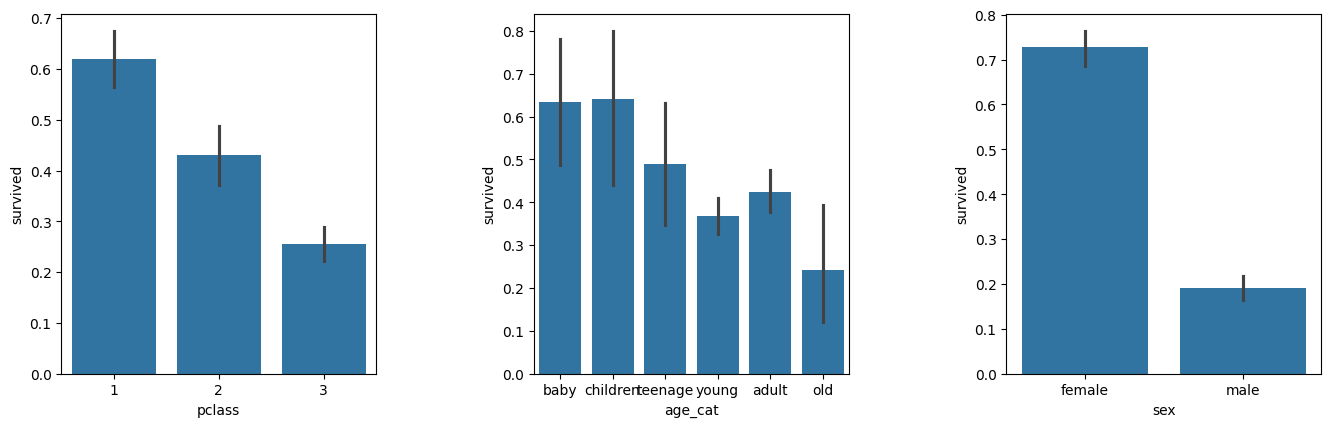

In [53]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
data=titanic_df
plt.figure(figsize=[14, 4])
plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=titanic_df)
plt.subplot(132)
sns.barplot(x='age_cat',y='survived', data=titanic_df)
plt.subplot(133)
sns.barplot(x='sex', y='survived', data=titanic_df)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show( )

In [54]:
titanic_df.groupby(['pclass', 'sex']).mean(numeric_only=True)

survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

In [60]:
boat_survivors = titanic_df[titanic_df['boat'].notnull()]
print(boat_survivors.groupby('sex')['survived'].mean())
nboat_survivors = titanic_df[titanic_df['boat'].isnull()]
print(nboat_survivors.groupby('sex')['survived'].mean())

sex
female    0.996865
male      0.952096
Name: survived, dtype: float64
sex
female    0.142857
male      0.002959
Name: survived, dtype: float64
